<a href="https://www.kaggle.com/code/haddonalexander25/spotify-top-100-with-matplotlib-and-pandas?scriptVersionId=98482980" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Spotify Top 100 Analysis Using Matplotlib and Pandas

Big thanks to PavanKalyan from Kaggle for creating such a user friendly dataset. The ultimate purpose for this exercise was to find insights about the Spotify Top 100 Songs using Matplotlib and Pandas. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

open_file = open("../input/top-100-most-streamed-songs-on-spotify/Top 100 most Streamed - Sheet1.csv")

df_spotify = pd.read_csv(open_file)

In [2]:
df_spotify.head()

,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86


In [3]:
df_spotify.dtypes

title               object
artist              object
top genre           object
year                 int64
beats.per.minute     int64
energy               int64
danceability         int64
loudness.dB          int64
liveness             int64
valance              int64
length               int64
acousticness         int64
speechiness          int64
popularity           int64
dtype: object

In [4]:
df_spotify.describe()

,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,2015.960000,116.970000,62.680000,66.96000,-6.100000,16.860000,49.970000,214.530000,24.95000,9.930000,79.670000
std,5.327497,27.470629,16.491737,13.60401,1.987334,12.972403,21.737857,35.934974,26.27876,9.424077,5.905065
min,1975.000000,71.000000,11.000000,35.00000,-14.000000,3.000000,6.000000,119.000000,0.00000,2.000000,53.000000
25%,2015.000000,95.000000,52.000000,59.00000,-7.000000,10.000000,33.750000,190.500000,4.00000,4.000000,79.000000
50%,2017.000000,115.000000,64.500000,69.00000,-6.000000,12.000000,48.000000,210.000000,13.00000,6.000000,81.000000
75%,2018.000000,135.250000,76.000000,77.00000,-5.000000,17.250000,66.000000,234.250000,41.50000,11.000000,83.000000
max,2021.000000,186.000000,92.000000,91.00000,-3.000000,79.000000,93.000000,354.000000,98.00000,46.000000,91.000000


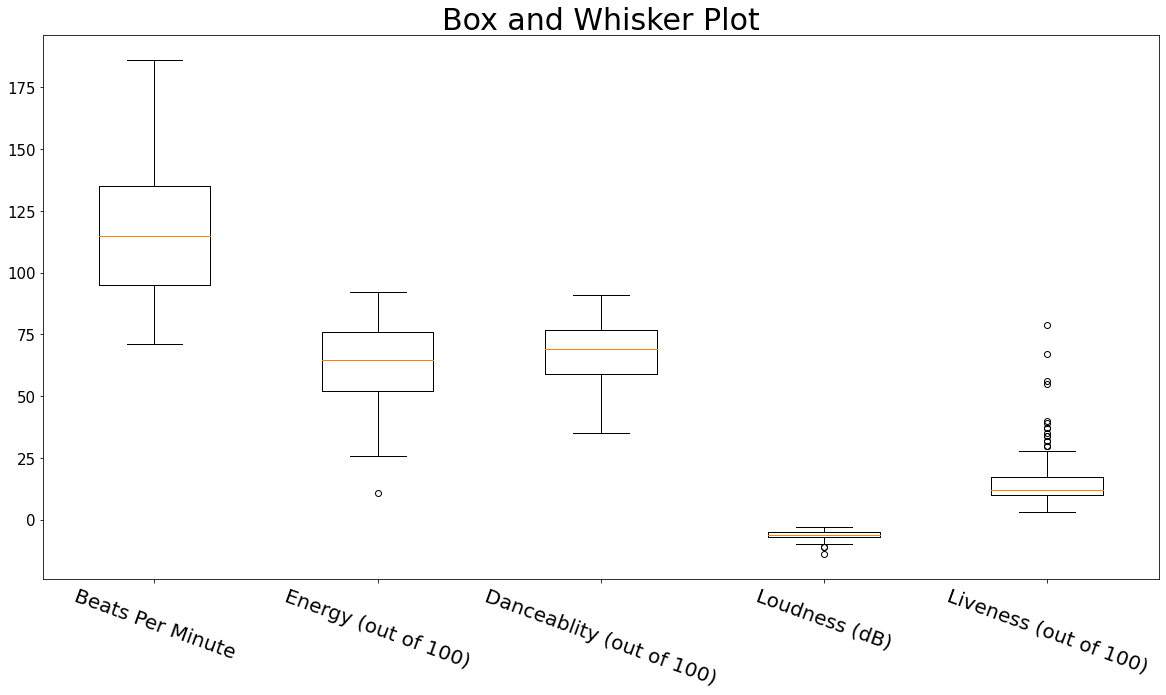

In [5]:
metrics = df_spotify[['beats.per.minute', 'energy', 'danceability', 'loudness.dB', 'liveness']]

plt.rcParams["figure.figsize"] = (20,10)

plt.rcParams.update({'font.size': 15})

plt.subplot().set_title('Box and Whisker Plot', fontsize = 30);

plt.xticks(fontsize = 20, rotation=-20)

plt.boxplot(metrics);

plt.xticks([1, 2, 3, 4, 5], ['Beats Per Minute', 'Energy (out of 100)', 'Danceablity (out of 100)', 'Loudness (dB)', "Liveness (out of 100)"]);



From the box and whisker plot above, some clear trends start to emerge from the Spotify Top 100. Over 50% of the top 100 songs have a faster beat/pace, of 100 to about 130 BPM. The top 100 songs also have a high energy and danceability rating, given the majority of the songs have a rating of over 50. The songs also tend to have a low liveness (likely hood of being a live recording) which indicates the vast majority of the spotify top 100 songs are studio recorded. 

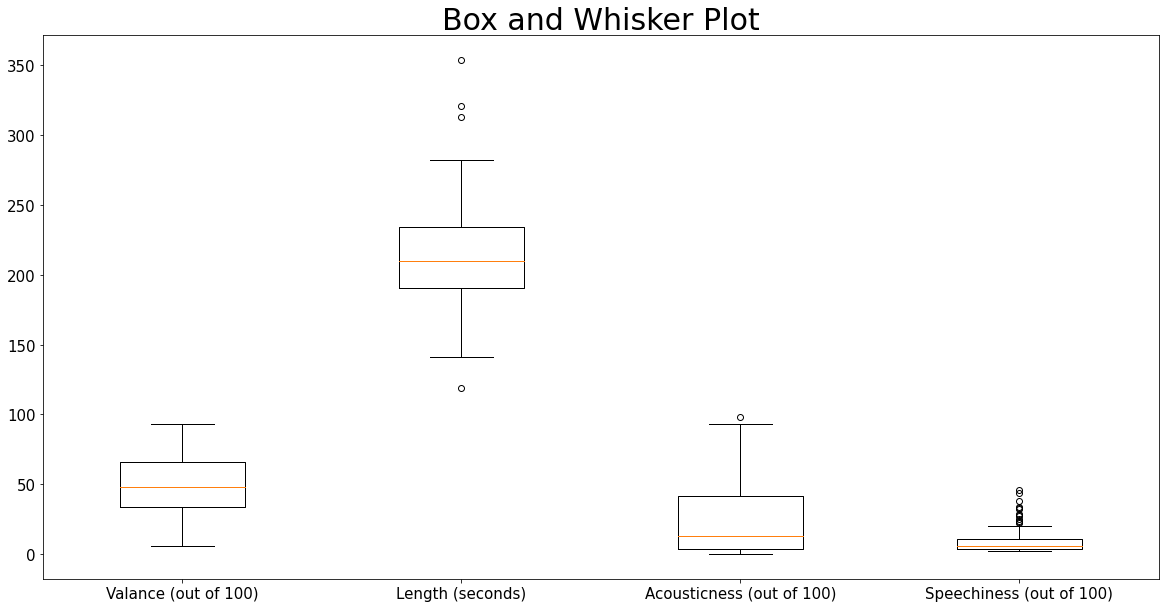

In [6]:
metrics = df_spotify[['valance', 'length', 'acousticness', 'speechiness']]

plt.rcParams["figure.figsize"] = (20,10)

plt.rcParams.update({'font.size' : 15})

plt.subplot().set_title('Box and Whisker Plot', fontsize = 30);

plt.boxplot(metrics);

plt.xticks([1, 2, 3, 4], ['Valance (out of 100)', 'Length (seconds)', 'Acousticness (out of 100)', 'Speechiness (out of 100)']);


To provide better visualization, the features were divided up into two groups to make two box and whisker plots. From the plot above, other insights start to emerge. The median song length was around 215 seconds with more than half of all songs being between about 190 and 230 seconds. Which indicates that songs between 3 and 4 minutes are most preferred by listeners. Acousticness and speechiness also have low ratings for the top 100 songs, indicating that listeners like electric/synthetic styles with low amounts of non musical speech. 

In [7]:
top_artists = df_spotify["artist"].value_counts().head(10).to_frame()

In [8]:
top_artists['Index'] = range(0, 0+len(top_artists))

top_artists = top_artists.reset_index().set_index('Index')

top_artists = top_artists.rename(columns = {"index" : "Artist", "artist" : "Appearance Count"})


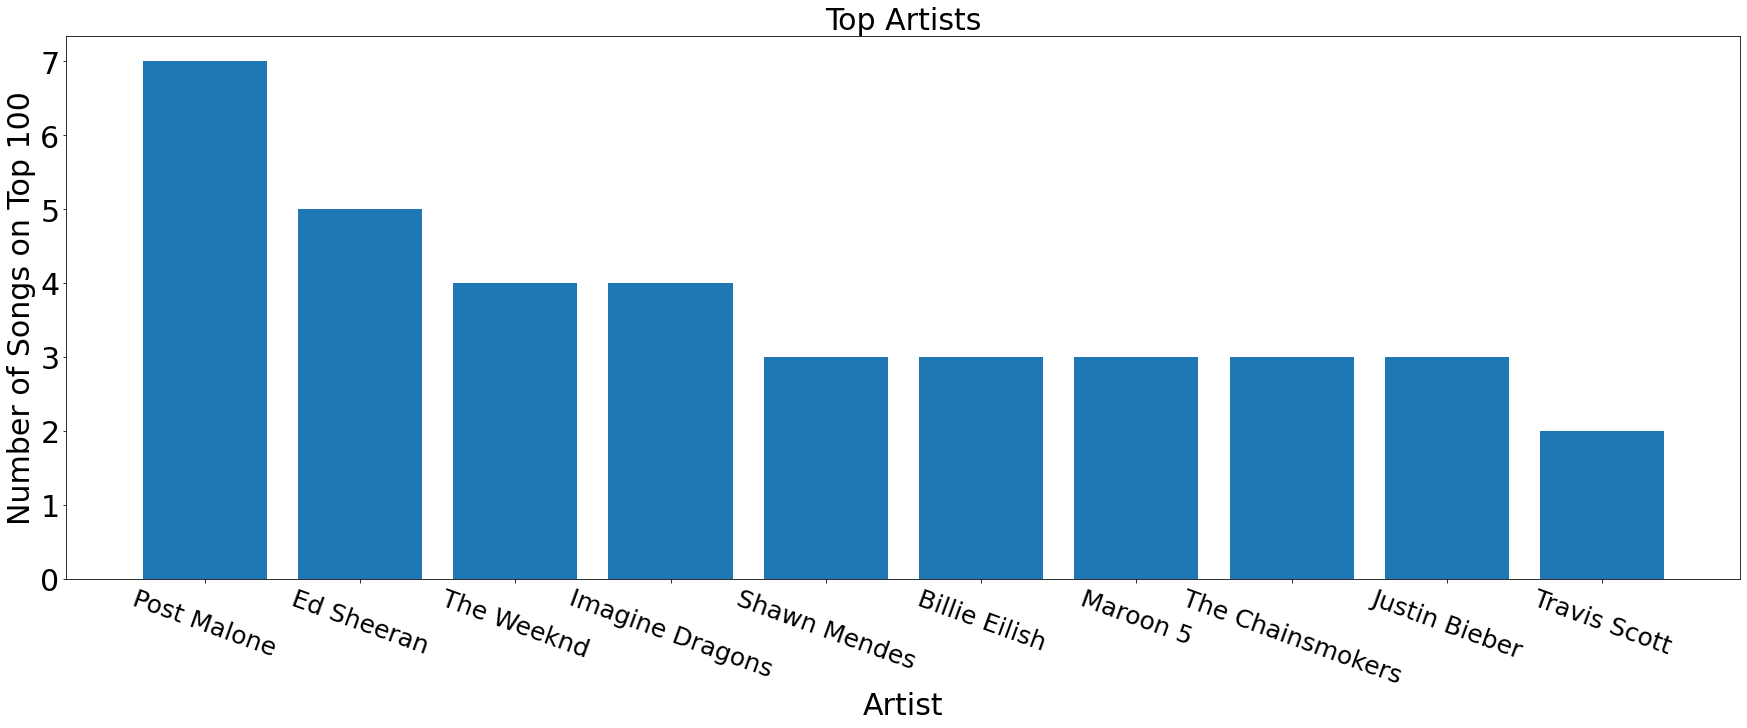

In [9]:
artists = top_artists["Artist"]

app = top_artists["Appearance Count"]

plt.rcParams["figure.figsize"] = (30,10)

plt.rcParams.update({'font.size' : 30})

plt.subplot().set_title('Top Artists', fontsize = 30)

plt.xticks(fontsize = 25, rotation=-20)

plt.yticks(fontsize =30)

plt.bar(artists, app)

plt.xlabel("Artist")

plt.ylabel("Number of Songs on Top 100")

plt.show()

In general, the top 10 artists by top 100 song appearances is not suprising. If one listens to mainstream radio, or follows popular spotify playlists, these artists will be familiar. 

In [10]:
top_genres = df_spotify["top genre"].value_counts().head(10).to_frame()

In [11]:
top_genres['Index'] = range(0, 0+len(top_artists))

top_genres = top_genres.reset_index().set_index('Index')

top_genres = top_genres.rename(columns = {"index" : "Genre", "top genre" : "Appearance Count"})

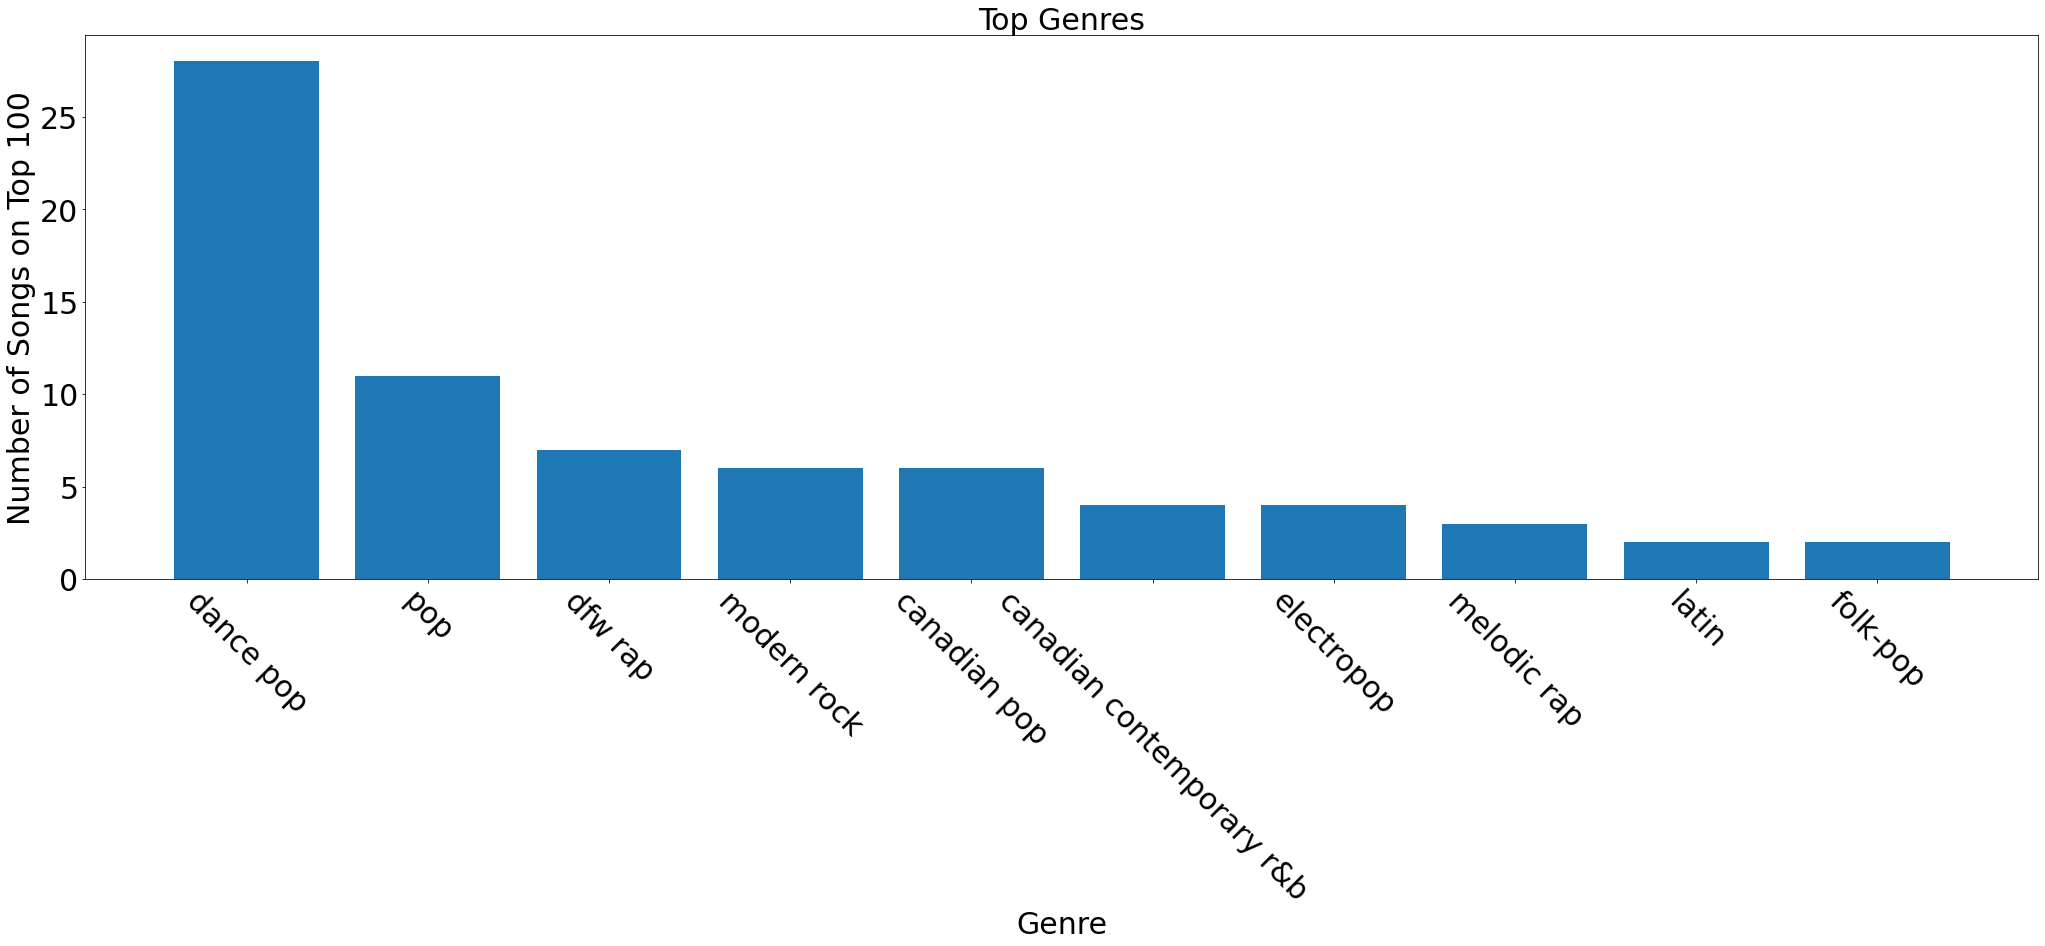

In [12]:
genres = top_genres["Genre"]

app = top_genres["Appearance Count"]

plt.rcParams["figure.figsize"] = (35,10)

plt.rcParams.update({'font.size' : 30})

plt.subplot().set_title("Top Genres", fontsize = 30)

plt.bar(genres, app)

plt.yticks(fontsize = 30)

plt.xticks(fontsize = 30, rotation=-45)

plt.xlabel("Genre")

plt.ylabel("Number of Songs on Top 100")

plt.show()

Dance pop by far had the most appreanances on the Spotify Top 100 than any other genre. However, it is interesting to note that while 8 out of the 10 genres for the Spotify Top 100 are all a type of pop or rap, there is distinction between the different groups. This indicates that either artists, labels, or listeners consider these genres to have distinct sub-genres. An interesting follow up study, assuming the data is available, would be to track these different sub-genres over time and see how they began to rise in popularity. 

In conclusion, through the use of Pandas and Matplotlib I was able to gather high level insights from the Spotify Top 100. The top 100 songs were generally a type of pop or rap, about 3 to 4 minutes in length, with high energy, high danceability, high pace, and used electric/synthetic instruments.